In [ ]:
# Importing libraries and all dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [ ]:
'''
Intoduction
Our dataset is based on the companies in USA. It provides various information ranging from year founded in a city to its business model, source of revenue and impact on the society. It’s a comprehensive dataset to analyze the various trends of the corporate world and how it affects employability and economy of the city.

The features include both numeric and non-numeric data. Numeric data includes ‘year_founded’, ‘zip_code’ and ‘last_updated’. The remaining 19 columns are non-numeric which gives description of the company, its type, category and its revenue source.

We have described the process of choosing the features by clearly stating the reasons for the same followed by cleaning to ensure smooth analysis. The columns we selected are ‘company_name’, ‘year_founded’, ‘city’,’state’, ‘full_time_employees’,’company_type’,’company_category’,’revenue_source’,’business_model’,’description’ and ‘description_short’.

We have converted ‘full_time_employees’ to numeric value to perform mathematical analysis such as to obtain the distribution across various cities, types and categories.

We have framed appropriate questions to extract meaningful insights into the data. We were able to get convincing results centered on preferred city, state for a company of a particular type and category and its impact on employability and emergence of different trends.

We have applied machine learning algorithm of multivariate logistic regression using Random Forest Classifier to predict ‘company_category’ by appropriately selecting features. The text features ‘business_model’, ‘description’ and ‘description_short’ have been combined to reduce dimensions. Text pre-processing has been applied to get the embeddings. TF-IDF technique has been applied to quantify the text data. Categorical numeric values have been assigned to ‘city’, ‘state’ and ‘company_category’ which is the predicted variable. ‘year_founded’ and ‘employees’ has also been included as numeric features. We obtained an accuracy of
61%
'''

'\nIntoduction\nOur dataset is based on the companies in USA. It provides various information ranging from year founded in a city to its business model, source of revenue and impact on the society. It’s a comprehensive dataset to analyze the various trends of the corporate world and how it affects employability and economy of the city.\n\nThe features include both numeric and non-numeric data. Numeric data includes ‘year_founded’, ‘zip_code’ and ‘last_updated’. The remaining 19 columns are non-numeric which gives description of the company, its type, category and its revenue source.\n\nWe have described the process of choosing the features by clearly stating the reasons for the same followed by cleaning to ensure smooth analysis. The columns we selected are ‘company_name’, ‘year_founded’, ‘city’,’state’, ‘full_time_employees’,’company_type’,’company_category’,’revenue_source’,’business_model’,’description’ and ‘description_short’.\n\nWe have converted ‘full_time_employees’ to numeric v

In [ ]:
'''
T9:

Context
The Open Data 500, funded by the John S. and James L. Knight Foundation (http://www.knightfoundation.org/) and conducted by the GovLab, is the first comprehensive study of U.S. companies that use open government data to generate new business and develop new products and services.

Study Goals
Provide a basis for assessing the economic value of government open data

Encourage the development of new open data companies

Foster a dialogue between government and business on how government data can be made more useful

The Govlab's Approach
The Open Data 500 study is conducted by the GovLab at New York University with funding from the John S. and James L. Knight Foundation. The GovLab works to improve people’s lives by changing how we govern, using technology-enabled solutions and a collaborative, networked approach. As part of its mission, the GovLab studies how institutions can publish the data they collect as open data so that businesses, organizations, and citizens can analyze and use this information.

Company Identification
The Open Data 500 team has compiled our list of companies through (1) outreach campaigns, (2) advice from experts and professional organizations, and (3) additional research.

Outreach Campaign

Mass email to over 3,000 contacts in the GovLab network

Mass email to over 2,000 contacts OpenDataNow.com

Blog posts on TheGovLab.org and OpenDataNow.com

Social media recommendations

Media coverage of the Open Data 500

Attending presentations and conferences

Expert Advice

Recommendations from government and non-governmental organizations

Guidance and feedback from Open Data 500 advisors

Research

Companies identified for the book, Open Data Now

Companies using datasets from Data.gov

Directory of open data companies developed by Deloitte

Online Open Data Userbase created by Socrata

General research from publicly available sources

What The Study Is Not
The Open Data 500 is not a rating or ranking of companies. It covers companies of different sizes and categories, using various kinds of data.

The Open Data 500 is not a competition, but an attempt to give a broad, inclusive view of the field.

The Open Data 500 study also does not provide a random sample for definitive statistical analysis. Since this is the first thorough scan of companies in the field, it is not yet possible to determine the exact landscape of open data companies.

Shape of the Data Set (529, 22)

'''
#import the dataset
DataSet=pd.read_csv('US500.csv')

#print the dimensions of the dataset
print(DataSet.shape)

(529, 22)


In [ ]:
print('Therefore from above, we have 529 rows and 22 columns in our dataset.')

Therefore from above, we have 529 rows and 22 columns in our dataset.


In [ ]:
#print the index of our dataset
print("The index of our dataset is ",DataSet.index)

The index of our dataset is  RangeIndex(start=0, stop=529, step=1)


In [ ]:
#print the first 5 entries of our dataset
print("The first five entries of our dataset")
DataSet.head()

The first five entries of our dataset


,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,...,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,...,"Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,...,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,...,"Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,...,NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,...,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802


In [ ]:
#print the last 5 entries of our dataset
print('The last five entries of our dataset')
DataSet.tail()

The last five entries of our dataset


,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,...,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
524,zillow,Zillow,http://www.zillow.com/,2006.0,Seattle,WA,us,98101.0,"1,001-5,000",Public,...,NaN,NaN,Zillow is a home and real estate marketplace d...,Zillow is an online real estate database.,NaN,NaN,NaN,[],NaN,2014-08-21 15:25:48.411679
525,zocdoc,ZocDoc,http://www.zocdoc.com/,2007.0,New York,NY,us,10012.0,"501-1,000",Private,...,NaN,NaN,ZocDoc is a service to help people find and ma...,Patients use ZocDoc to book appointments with ...,NaN,NaN,NaN,[],NaN,2014-04-03 20:10:00.163762
526,zonability,Zonability,http://www.zonability.com/,2003.0,Austin,TX,us,78702.0,11-50,Private,...,"Business to Business, Business to Government, ...",NaN,Zonability is a web application that provides ...,Zonability is a web application that provides ...,NaN,NaN,NaN,[],NaN,2014-11-20 12:45:39.832982
527,zoner,Zoner,www.Zonerapp.com,2011.0,New York,NY,us,10018.0,1-10,Private,...,"Business to Business, Business to Consumer, no...",NaN,<p>Zoner is a Digital Zoning Optimization soft...,Zoner leverages transparency over fear so a pr...,1-10,NaN,NaN,[],NaN,2014-11-12 18:11:48.966303
528,zurich-insurance-risk-room,Zurich Insurance (Risk Room),http://www.zurichna.com/,1912.0,Schaumburg,IL,us,60196.0,"10,001+",Public,...,NaN,NaN,Zurich Risk Room helps corporate customers gai...,The Zurich Risk Room is a proprietary global r...,NaN,NaN,NaN,[],NaN,2014-04-03 20:05:51.995718


In [ ]:
#print the size of our dataset
print('Size of our dataset is : ',DataSet.size)

Size of our dataset is :  11638


In [ ]:
#print information of all variables in the dataset
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_name_id      529 non-null    object 
 1   company_name         529 non-null    object 
 2   url                  529 non-null    object 
 3   year_founded         528 non-null    float64
 4   city                 496 non-null    object 
 5   state                529 non-null    object 
 6   country              529 non-null    object 
 7   zip_code             492 non-null    float64
 8   full_time_employees  500 non-null    object 
 9   company_type         513 non-null    object 
 10  company_category     526 non-null    object 
 11  revenue_source       519 non-null    object 
 12  business_model       453 non-null    object 
 13  social_impact        16 non-null     object 
 14  description          529 non-null    object 
 15  description_short    529 non-null    obj

In [ ]:
#get summary of orginal data
DataSet.describe()

,year_founded,zip_code
count,528.000000,492.000000
mean,1992.700758,47455.878049
std,33.853259,37374.897009
min,1799.000000,0.000000
25%,1994.000000,10018.750000
50%,2007.000000,37025.500000
75%,2010.000000,94025.000000
max,2015.000000,98144.000000


In [ ]:
#finding out numeric and non-numeric data type columns
print('From above it is clear that only 2 columns : "year_founded" and "zip_code" have numeric value.')

From above it is clear that only 2 columns : "year_founded" and "zip_code" have numeric value.


In [ ]:
#print the columns in our dataset
print('Features in our dataset')
DataSet.columns

Features in our dataset


Index(['company_name_id', 'company_name', 'url', 'year_founded', 'city',
       'state', 'country', 'zip_code', 'full_time_employees', 'company_type',
       'company_category', 'revenue_source', 'business_model', 'social_impact',
       'description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts', 'financial_info', 'last_updated'],
      dtype='object')

In [ ]:
#print the number of unique values in each column of our dataset
print('the number of unique values in each column of our dataset.')

#nunique returns a series, we have to convert it into data frame
unique = DataSet.nunique().reset_index()
unique

the number of unique values in each column of our dataset.


,index,0
0,company_name_id,529
1,company_name,529
2,url,528
3,year_founded,95
4,city,202
5,state,39
6,country,1
7,zip_code,326
8,full_time_employees,8
9,company_type,9


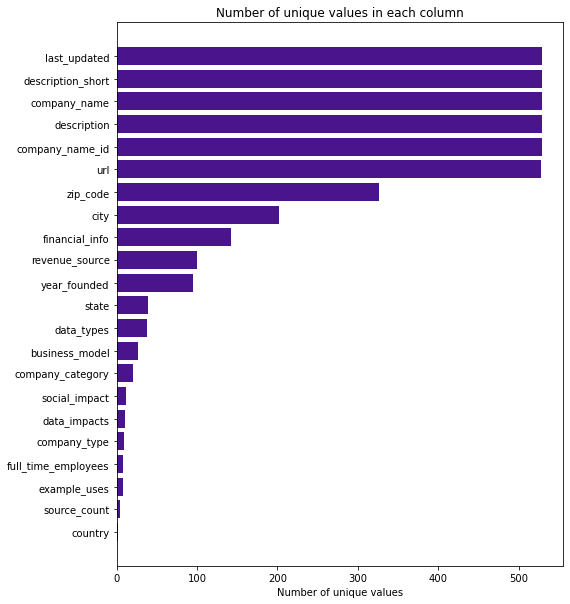

In [ ]:
#a plot of number of unique values in each feature Vs features
unique.columns = ['Feature','Number_of_Unique_Values']
#sns.barplot(x='Feature',y='Number of Unique',data=unique)
unique = unique.sort_values(by='Number_of_Unique_Values')
ind = np.arange(unique.shape[0])
width = 1.7
fig, ax = plt.subplots(figsize=(8,10))
rects = ax.barh(ind, unique.Number_of_Unique_Values.values, color='#4A148C')
ax.set_yticks(ind)
ax.set_yticklabels(unique.Feature.values, rotation='horizontal')
ax.set_xlabel("Number of unique values")
ax.set_title("Number of unique values in each column")
plt.show()

In [ ]:
#from above bar plot we can see that the 6th plot of country has neglible unique values and from the previous data frame we see that it is 1
print('The only unique value in country feature is ')
DataSet["country"].unique()

The only unique value in country feature is 


array(['us'], dtype=object)

In [ ]:
#'us' is the only unique value and since our dataset is based on 'Companies in the US' we can drop the column
# we can as well drop the 'zip_code' feauture
DataSet = DataSet.drop(['country','zip_code'], axis = 1)

In [ ]:
#check for missing values
print("Are there missing values in our dataset ? ",DataSet.isnull().values.any())

Are there missing values in our dataset ?  True


In [ ]:
#So, we have null values!
#print the number of missing values present
print("The number of missing values in our dataset : ",DataSet.isnull().values.sum())

The number of missing values in our dataset :  2279


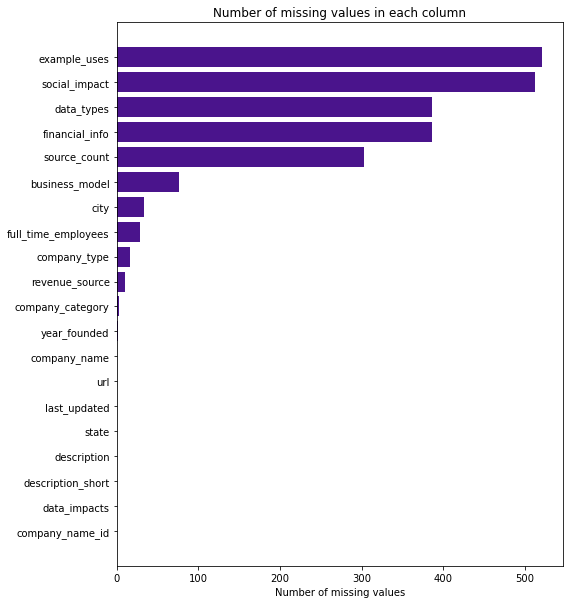

In [ ]:
#we have a lot of null values!
#lets analyze the number of NAN values for each column
missing = DataSet.isnull().sum(axis=0).reset_index()
missing.columns = ['Feature', 'Number_missing_values']
missing = missing.sort_values(by='Number_missing_values')

ind = np.arange(missing.shape[0])
width = 1.7
fig, ax = plt.subplots(figsize=(8,10))
rects = ax.barh(ind, missing.Number_missing_values.values, color='#4A148C')
ax.set_yticks(ind)
ax.set_yticklabels(missing.Feature.values, rotation='horizontal')
ax.set_xlabel("Number of missing values")
ax.set_title("Number of missing values in each column")
plt.show()


In [ ]:
#Let's prepare our dataset.
#In this first part of preparing our dataset, we decide on which columns to keep by clearly stating the reasons for
#dropping the columns which are not required in our analysis.

In [ ]:
#from the above plot it is clear that we cannot use 'example_uses' and 'social_impact' as they have a lot of missing values
#we cannot also directly use 'data_types' and 'financial_info'
#let us drop 'example_uses' and 'social_impact' along with the above two
#'source_count' also has a considerable number of missing values, so let's drop it as well

DataSet = DataSet.drop(['example_uses','social_impact','data_types','financial_info','source_count'], axis = 1)


In [ ]:

#'data_impacts' though has no missing values (as indicated in above plot), has a lot of empty lists !
d_imp = DataSet['data_impacts']

#let's count the number of empty lists and check whether if it is useful for our analysis
count=0

for i in range(0,len(d_imp)):
    if len(d_imp[i]) == 2:
        count = count+1

print(count," out of ",len(d_imp)," are empty")

#that's a lot of empty lists, hence we can drop that as well
DataSet = DataSet.drop(['data_impacts'],axis=1)


515  out of  529  are empty


In [ ]:
#Let's check 'company_name_id' and 'company_name' if their contents are similar or not
#If they are similar we can drop 'company_name_id'
from difflib import SequenceMatcher

def similar(a,b):
    return SequenceMatcher(None,a,b).ratio()

avg = 0 #average similarity ratio

c_name = DataSet["company_name"] #stores 'company_name'
c_id = DataSet["company_name_id"] #stores 'company_name_id'

for i in range(0,len(c_name)):
    avg = avg + similar(c_name[i],c_id[i])
avg = (avg/len(c_name)) * 100
print("On an average, corresponding pairs of 'company_name' and 'company_name_id' have similarity of :",avg,"%")

#Let's check the similarity between 'company_name' and 'url'
avg = 0

url = DataSet["url"] #stores 'url'

for i in range(0,len(c_name)):
    avg = avg + similar(c_name[i],url[i])
avg = (avg/len(c_name)) * 100
print("On an average, corresponding pairs of 'company_name' and 'url' have similarity of :",avg,"%")
print("Lower similarity is due to the presence of prefixes such as 'http://','www.' and suffix such as '.com'")

On an average, corresponding pairs of 'company_name' and 'company_name_id' have similarity of : 75.20003963831614 %
On an average, corresponding pairs of 'company_name' and 'url' have similarity of : 43.2205438099681 %
Lower similarity is due to the presence of prefixes such as 'http://','www.' and suffix such as '.com'


In [ ]:
#Let's drop 'company_name_id'
#Since the URL does not provide any particular insights into the company, we can drop it
DataSet = DataSet.drop(["company_name_id","url"],axis=1)

In [ ]:
#We can drop 'last_updated' feauture as for most of the companies it was updated on 2014 and a for few of them around 2014.
#We can also drop 'description_short'
DataSet = DataSet.drop(['last_updated'],axis=1)
#Finally, we have obtained our dataset to work on!

#display the first few entries of our data set
DataSet.head()

,company_name,year_founded,city,state,full_time_employees,company_type,company_category,revenue_source,business_model,description,description_short
0,"3 Round Stones, Inc.",2010.0,Washington,DC,1-10,Private,Data/Technology,"Data analysis for clients, Database licensing,...","Business to Business, Business to Consumer",3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...
1,48 Factoring Inc.,2014.0,Philadelphia,PA,51-200,Private,Finance & Investment,Financial Services,Business to Business,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...
2,5PSolutions,2007.0,Fairfax,VA,1-10,Private,Data/Technology,"Subscriptions, User fees for web or mobile access","Business to Business, Business to Consumer, Bu...","At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.
3,Abt Associates,1965.0,Cambridge,MA,"1,001-5,000",Private,Research & Consulting,"Data analysis for clients, Database licensing",NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea..."
4,Accela,1999.0,San Ramon,CA,"501-1,000",Private,Governance,Not reported by company,Business to Consumer,Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...


In [ ]:
#display the last few entries of our data set
DataSet.tail()

,company_name,year_founded,city,state,full_time_employees,company_type,company_category,revenue_source,business_model,description,description_short
524,Zillow,2006.0,Seattle,WA,"1,001-5,000",Public,Housing/Real Estate,Not reported by company,NaN,Zillow is a home and real estate marketplace d...,Zillow is an online real estate database.
525,ZocDoc,2007.0,New York,NY,"501-1,000",Private,Healthcare,Not reported by company,NaN,ZocDoc is a service to help people find and ma...,Patients use ZocDoc to book appointments with ...
526,Zonability,2003.0,Austin,TX,11-50,Private,Housing/Real Estate,Not reported by company,"Business to Business, Business to Government, ...",Zonability is a web application that provides ...,Zonability is a web application that provides ...
527,Zoner,2011.0,New York,NY,1-10,Private,Housing/Real Estate,Subscriptions,"Business to Business, Business to Consumer, no...",<p>Zoner is a Digital Zoning Optimization soft...,Zoner leverages transparency over fear so a pr...
528,Zurich Insurance (Risk Room),1912.0,Schaumburg,IL,"10,001+",Public,Insurance,Not reported by company,NaN,Zurich Risk Room helps corporate customers gai...,The Zurich Risk Room is a proprietary global r...


In [ ]:
#print the dimensions and feautures of our dataset
print("Our dataset has ",DataSet.shape[0]," rows and ",DataSet.shape[1]," columns (features)")
print("Our features are")

#Let columns be a list that contains all feauture names
columns = DataSet.columns

Our dataset has  529  rows and  11  columns (features)
Our features are


In [ ]:
#Now, let's check for NULL values and try to replace them with a defined value to ease our analysis
#check for missing values
DataSet.isnull().values.any()

True

In [ ]:
#There are NULL values!
#Let's check which column has NULL values

column_na = []

for c in columns:

    if DataSet[c].isnull().values.any():
        column_na.append(c)
print("These columns have missing values : ")
column_na


These columns have missing values : 


['year_founded',
 'city',
 'full_time_employees',
 'company_type',
 'company_category',
 'revenue_source',
 'business_model']

In [ ]:
#In this second part of preparing our dataset, we clean the columns so as to help in our analysis.
#We will be focusing on the columns displayed in the previous cell which have missing values and hence need to be 'cleaned'

In [ ]:
#Lets begin with populating the missing values of 'year_founded' and 'city' by data available on the internet
#'year_founded'

print("Number of missing values in 'year_founded' : ",DataSet['year_founded'].isnull().sum())

j = 0 # to get the index
for i in DataSet['year_founded']:
    if(np.isnan(i)):
        break
    else:
        j = j+1

print("The only missing value found at : ", j)
DataSet['company_name'][j]

#Even the city is unknown
#Even the company type
#By searching on the internet, we obtain the following information

DataSet['year_founded'][j] = 2013
DataSet['city'][j] = 'Daytona Beach'
DataSet['company_type'][j] = 'Private'
DataSet['business_model'][j] = 'Business to Business'

Number of missing values in 'year_founded' :  1
The only missing value found at :  291


<ipython-input-172-08b204178726>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet['year_founded'][j] = 2013
<ipython-input-172-08b204178726>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet['city'][j] = 'Daytona Beach'
<ipython-input-172-08b204178726>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet['company_type'][j] = 'Private'
<ipython-input-172-08b204178726>:23: SettingWithCopyWarning: 
A value is trying 

In [ ]:
#lets fill the missing values of 'city'
print("Number of missing values in 'city' : ",DataSet['city'].isnull().sum())
DataSet['city'].fillna("City Not Available", inplace=True)

Number of missing values in 'city' :  32


In [ ]:
#let's fill the missing values of'full_time_employees'
print("Number of missing values in 'full_time_employees' : ",DataSet['full_time_employees'].isnull().sum())
DataSet['full_time_employees'].fillna("Count not available", inplace=True)

Number of missing values in 'full_time_employees' :  29


In [ ]:
#let's make the 'full_time_employees' column fit for our analysis
employees = []

#as we can see this of 'object' dtype.
#let's replace it with numeric values


for i in range(len(DataSet['full_time_employees'])):

    s = DataSet['full_time_employees'][i]

    if(type(s) == str):          #some of the entries are 'str'
        s = s.replace(',','')    #remove ','
        if ('-' in s):           #remove '-'
            p = s.find('-')
            employees.append(int(s[p+1 : ]))

        elif ('+' in s):         #remove '+'
            employees.append(int(s[0:len(s)-1]))

        else :                   #remove missing values
            employees.append(-1) #'Count not available'
    else :                       #some of the values are numeric, which need not be modified
        employees.append(int(s))

#let's create a new feature called as 'employees'
DataSet['employees'] = employees
#let's downcast the data type to integer, as we do not require values to have decimal point
DataSet['employees'].astype(int)
#let's discard 'full_time_employees'
DataSet = DataSet.drop(['full_time_employees'], axis=1)

In [ ]:
#let's fill the missing values in 'employees' by the average value
#missing values was replaced by '-1'
DataSet['employees'] = DataSet['employees'].replace([-1],DataSet['employees'].mean())

In [ ]:
#Let's fill the missing values of 'company_type'
print("Number of missing values in 'company_type' : ",DataSet['company_type'].isnull().sum())
DataSet['company_type'].fillna("Company type not revealed", inplace=True)

Number of missing values in 'company_type' :  15


In [ ]:
#Let's fill the missing values of 'company_type'
print("Number of missing values in 'company_category' : ",DataSet['company_category'].isnull().sum())
DataSet['company_category'].fillna("Company category not available", inplace=True)

Number of missing values in 'company_category' :  3


In [ ]:
#Let's fill the missing values of 'revenue_source'
print("Number of missing values in 'revenue_source' : ",DataSet['revenue_source'].isnull().sum())
DataSet['revenue_source'].fillna("not reported by company", inplace=True)
DataSet['revenue_source'] = DataSet["revenue_source"].str.lower()

Number of missing values in 'revenue_source' :  10


In [ ]:
#Let's fill the missing values of 'business_model'
print("Number of missing values in 'business_model' : ",DataSet['business_model'].isnull().sum())
DataSet['business_model'].fillna("Not reported by company", inplace=True)
DataSet["business_model"] = DataSet["business_model"].str.lower()

Number of missing values in 'business_model' :  75


In [ ]:
#Let's start exploring the Dataset to get insights
'''
Our Dataset
'''
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       529 non-null    object 
 1   year_founded       529 non-null    float64
 2   city               529 non-null    object 
 3   state              529 non-null    object 
 4   company_type       529 non-null    object 
 5   company_category   529 non-null    object 
 6   revenue_source     529 non-null    object 
 7   business_model     529 non-null    object 
 8   description        529 non-null    object 
 9   description_short  529 non-null    object 
 10  employees          529 non-null    float64
dtypes: float64(2), object(9)
memory usage: 45.6+ KB


In [ ]:
#explore the 'company_name' feature

print("Count of number of companies for each letter")
print(Counter(s[0] for s in DataSet['company_name']))

letter_count = Counter(s[0] for s in DataSet['company_name'])

Count of number of companies for each letter
Counter({'C': 59, 'S': 45, 'P': 37, 'A': 36, 'E': 26, 'T': 26, 'M': 25, 'G': 24, 'B': 23, 'R': 22, 'I': 21, 'F': 20, 'L': 19, 'O': 19, 'W': 17, 'N': 16, 'H': 14, 'D': 13, 'K': 10, 'U': 9, 'V': 8, 'i': 6, 'Z': 6, 'J': 5, 'Q': 4, 'X': 3, 'Y': 3, 'e': 2, '3': 1, '4': 1, '5': 1, 'g': 1, 'k': 1, '(': 1, 'm': 1, 'n': 1, 'o': 1, 'r': 1, 'x': 1})


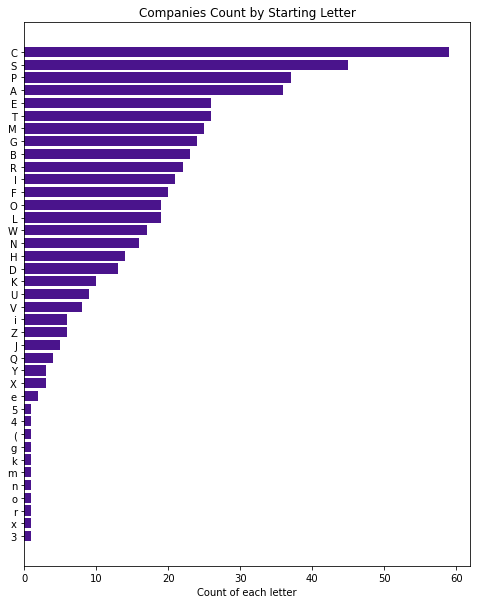

In [ ]:
#let's visualize it

letter = list(letter_count.keys()) #extracts the keys
count = list(letter_count.values()) #extracts the values

letters_dict = {"Letters":letter,"Count":count}
letters_df = pd.DataFrame(letters_dict)

letters_df = letters_df.sort_values(by='Count')
ind = np.arange(letters_df.shape[0])

width = 1.7
fig, ax = plt.subplots(figsize=(8,10))
rects = ax.barh(ind, letters_df.Count.values, color='#4A148C')

ax.set_yticks(ind)
ax.set_yticklabels(letters_df.Letters.values, rotation='horizontal')
ax.set_xlabel("Count of each letter")
ax.set_title("Companies Count by Starting Letter")
plt.show()

In [ ]:
#From above plot

print("Which is the most popular letter for companies' name to begin with ?")
keymax = max(zip(letter_count.values(),letter_count.keys()))[1]
print(keymax)

Which is the most popular letter for companies' name to begin with ?
C


In [ ]:
print("What is the trend in length of companies' name over time ?")

What is the trend in length of companies' name over time ?


In [ ]:
#Let's see if there is any relation between length of the name of company and year founded.
from scipy.stats.stats import pearsonr

length_c = []

for name in DataSet['company_name']:
    length_c.append(len(name))

cor,p_value = pearsonr(length_c,DataSet['year_founded'])
print(cor)

print("As we can see a negative correlation, this indicates that with progress in age, companies' names are getting shorter")

-0.14428066728140604
As we can see a negative correlation, this indicates that with progress in age, companies' names are getting shorter


In [ ]:
print("Which 5 cities has the most number of companies ?")

DataSet['city'].value_counts()[:5].index.tolist()


Which 5 cities has the most number of companies ?


['New York', 'San Francisco', 'City Not Available', 'Boston', 'Chicago']

In [ ]:
print("Which 5 states has the most number of companies ?")

DataSet['state'].value_counts()[:5].index.tolist()

Which 5 states has the most number of companies ?


['CA', 'NY', 'MA', 'IL', 'WA']

In [ ]:
print("California (STATE) and New York (CITY) have the most number of companies.")

California (STATE) and New York (CITY) have the most number of companies.


Plot the count of companies in each state
Its clear from the plot below that very few states are represented and many companies are from New York and California.


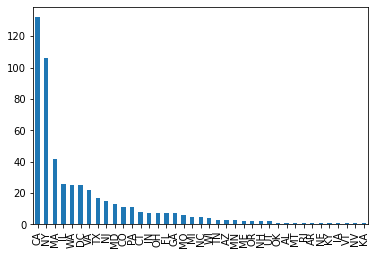

In [ ]:
print("Plot the count of companies in each state")
state_count = DataSet['state'].value_counts().plot.bar()
print('Its clear from the plot below that very few states are represented and many companies are from New York and California.')

Which year had the most companies established and where were they founded ?
The year which had the most number of companies established was  2011
In the year 2011 , companies were established in : 


CA    17
NY    15
DC     4
IL     4
MA     3
CO     2
WA     1
MI     1
WI     1
FL     1
MD     1
TX     1
Name: state, dtype: int64

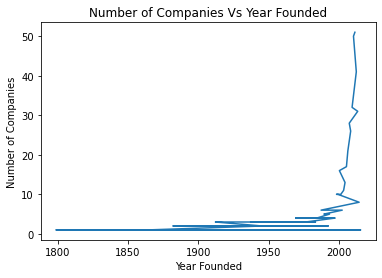

In [ ]:
print("Which year had the most companies established and where were they founded ?")
year = int(DataSet['year_founded'].mode()[0])
print("The year which had the most number of companies established was ",int(year))
DataSet['year_founded'].value_counts().plot(title = 'Number of Companies Vs Year Founded',ylabel = 'Number of Companies',xlabel='Year Founded')

print("In the year",year,", companies were established in : ")
DataSet[DataSet['year_founded'] == year]['state'].value_counts()

In [ ]:
print("Obtain the description of 'employees' feature")
DataSet['employees'].describe()

Obtain the description of 'employees' feature


count      529.000000
mean      1855.077158
std       3441.234805
min         10.000000
25%         10.000000
50%        200.000000
75%       1000.000000
max      10001.000000
Name: employees, dtype: float64

In [ ]:
print("When and where was the oldest company in our dataset founded ?")
DataSet[DataSet['year_founded'] == DataSet['year_founded'].min()]

When and where was the oldest company in our dataset founded ?


,company_name,year_founded,city,state,company_type,company_category,revenue_source,business_model,description,description_short,employees
249,J.P. Morgan Chase,1799.0,New York,NY,Public,Finance & Investment,not reported by company,"business to business, business to consumer, bu...",J.P. Morgan Chase is a global financial servic...,"J.P. Morgan Chase offers investment banking, f...",10001.0


In [ ]:
print("From this we can infer that, 'Finance & Investmnet' was the earliest category of company")

From this we can infer that, 'Finance & Investmnet' was the earliest category of company


In [ ]:
print("When and where was the latest company in our dataset founded ?")
DataSet[DataSet['year_founded'] == DataSet['year_founded'].max()]

When and where was the latest company in our dataset founded ?


,company_name,year_founded,city,state,company_type,company_category,revenue_source,business_model,description,description_short,employees
332,Open Data Nation,2015.0,Washington,DC,Private,Research & Consulting,"consulting, data analysis for clients, governm...",business to business,Open Data Nation (opendatanation.com) creates ...,"Open Data Nation creates plug-and-play, produc...",10.0


In [ ]:
print("From this we can infer that 'Research & Consulting' is the latest category of company")

From this we can infer that 'Research & Consulting' is the latest category of company


In [ ]:
print("Which companies have the most number of Full-Time Employees ?")
DataSet[DataSet['employees'] == 10001]['company_name'].tolist() #100001 from the description

Which companies have the most number of Full-Time Employees ?


['Accenture',
 'Adobe Digital Government',
 'Allianz',
 'AllState Insurance Group',
 'Bing',
 'BlackRock',
 'Bloomberg',
 'Booz Allen Hamilton',
 'Canon',
 'Cerner',
 'CGI',
 'Charles Schwab Corp.',
 'Chubb',
 'Citigroup',
 'Deloitte',
 'EMC',
 'Ernst & Young LLP',
 'Experian',
 'Farmers',
 'Fidelity Investments',
 'Fujitsu',
 'Harris Corporation',
 'IBM',
 'Impact Forecasting (Aon)',
 'J.P. Morgan Chase',
 'Kaiser Permanante',
 'KPMG',
 'LexisNexis',
 'Liberty Mutual Insurance Cos.',
 'McGraw Hill Financial',
 'McKinsey',
 'Merrill Corp.',
 'Merrill Lynch',
 'MetLife',
 'Microsoft Windows Azure Marketplace',
 'Morgan Stanley',
 'Nationwide Mutual Insurance Company',
 'Nielsen',
 'OnStar',
 'OptumInsight',
 'Parsons Brinckerhoff',
 'PricewaterhouseCoopers (PWC)',
 'Progressive Insurance Group',
 'R R Donnelley',
 'Reed Elsevier',
 'SAP',
 'SAS',
 "Standard and Poor's",
 'State Farm Insurance',
 'The Vanguard Group',
 'Thomson Reuters',
 'USAA Group',
 'Weight Watchers',
 'Wolters Kluwe

In [ ]:
print("How many companies have above average number of workers ?")
len(DataSet[DataSet['employees'] > DataSet['employees'].mean()])

How many companies have above average number of workers ?


102

In [ ]:
print("Which states have the most number of Full Time Employees ?")
print("STATES")
DataSet[DataSet['employees'] == 10001]['state'].tolist()

Which states have the most number of Full Time Employees ?
STATES


['IL',
 'CA',
 'NY',
 'IL',
 'WA',
 'GA',
 'NY',
 'VA',
 'NY',
 'MO',
 'NY',
 'CA',
 'NJ',
 'NY',
 'NY',
 'MA',
 'NY',
 'CA',
 'CA',
 'MA',
 'CA',
 'FL',
 'NY',
 'IL',
 'NY',
 'CA',
 'NY',
 'NY',
 'MA',
 'NY',
 'NY',
 'MN',
 'NY',
 'NY',
 'WA',
 'NY',
 'OH',
 'NY',
 'MI',
 'MN',
 'NY',
 'NY',
 'OH',
 'IL',
 'NY',
 'PA',
 'NC',
 'NY',
 'IL',
 'PA',
 'NY',
 'TX',
 'NY',
 'MN',
 'CA',
 'IL']

In [ ]:
print("What are the different kinds of 'company_type'?")
per=DataSet.groupby(["company_type"])["company_type"].count()
pel=list(per)
print(pel,per)

What are the different kinds of 'company_type'?
[15, 15, 2, 1, 397, 92, 1, 1, 4, 1] company_type
Company type not revealed          15
Nonprofit                          15
Partnership                         2
Permitting Assistance               1
Private                           397
Public                             92
Public (Federal-USGS)               1
nonprofit + commercial spinoff      1
partnership                         4
sole proprietorship                 1
Name: company_type, dtype: int64


In [ ]:
print("From above, it is clear that 'Private' companies are more in number")

From above, it is clear that 'Private' companies are more in number


array([<AxesSubplot:ylabel='company_type'>], dtype=object)

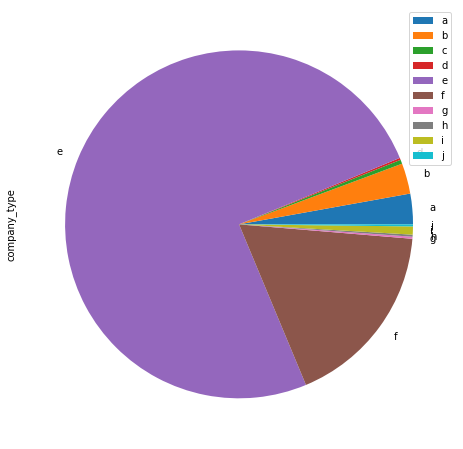

In [ ]:
#pie chart describing 'company_type'
#alphabetical order follows the above result.
per = pd.DataFrame(pel, index=["a", "b", "c", "d","e","f","g","h","i","j"], columns = ["company_type"])
per.plot.pie(subplots=True ,figsize=(8,8))


<AxesSubplot:xlabel='company_type'>

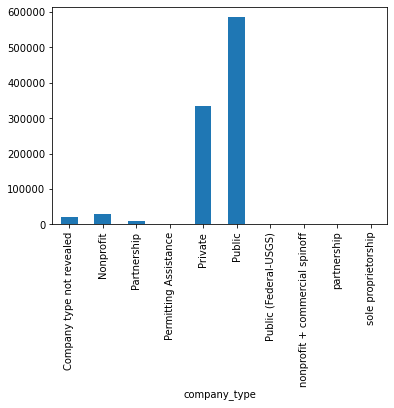

In [ ]:
#Lets find out how is the employees distribution among different company types
a=DataSet.groupby(['company_type'])['employees'].sum()
a.plot(kind="bar")

In [ ]:
print("From the above plot it is clear that 'Public' companies have the most number of employees")

From the above plot it is clear that 'Public' companies have the most number of employees


In [ ]:
print("It is surprising that even though there are lot of a 'Private' companies, most of them are employed in 'Public' companies.")

It is surprising that even though there are lot of a 'Private' companies, most of them are employed in 'Public' companies.


In [ ]:
print("What 'company_type' has the most number of employees in a city ?")
pil = DataSet.groupby(["city","company_type"])["employees"].sum()
pil = pd.DataFrame(pil)
pil.head(10)

What 'company_type' has the most number of employees in a city ?


employees
city          company_type           
 Philadelphia Private           200.0
Addison       Private           200.0
Ames          Private          1000.0
Amherst       Private           200.0
Ann Arbor     Private            50.0
              Public             50.0
Arlington     Private            60.0
Armonk        Public          10001.0
Atlanta       Private           220.0
              Public          25001.0

In [ ]:
#City-wise distribution of 'company_type'
cop=DataSet.groupby(["city"])["company_type"].value_counts()
copdf=pd.DataFrame(cop)
copdf["counts_max"]=copdf.groupby(["city"])["company_type"].transform(sum)

In [ ]:
#displaying the first 5 entries
copdf.head(5)

,,company_type,counts_max
city,company_type,,
Philadelphia,Private,1,1
Addison,Private,1,1
Ames,Private,1,1
Amherst,Private,1,1
Ann Arbor,Private,1,2


In [ ]:
#displaying the last 5 entries
copdf.tail(5)

,,company_type,counts_max
city,company_type,,
White River Junction,Private,1,1
Williamsville,partnership,1,1
Wyckoff,Private,1,1
Yonkers,Nonprofit,1,1
Yorkville,Private,1,1


In [ ]:
#state-wise distribution of 'company_type'
dr=DataSet.groupby(["state","company_type"])["company_type"].count()

In [ ]:
#displaying the first 5 entries
dr.head(5)

state  company_type             
AL     Private                      1
AR     Public                       1
AZ     Private                      2
       Public                       1
CA     Company type not revealed    3
Name: company_type, dtype: int64

In [ ]:
#displaying the last 5 entries
dr.tail(5)

state  company_type             
WA     Company type not revealed     1
       Nonprofit                     1
       Private                      17
       Public                        6
WI     Private                       4
Name: company_type, dtype: int64

In [ ]:
print("What is the 'company_type' distribution in the 'city' with most number of companies")
print(copdf[copdf.counts_max==copdf.counts_max.max()])

What is the 'company_type' distribution in the 'city' with most number of companies
                                    company_type  counts_max
city     company_type                                       
New York Private                              54          83
         Public                               17          83
         Company type not revealed             7          83
         Nonprofit                             3          83
         Partnership                           1          83
         sole proprietorship                   1          83


In [ ]:
print("In the city of New York, 'Private' companies are more in number")

In the city of New York, 'Private' companies are more in number


In [ ]:
print("What are the different types of 'company_category'?")
DataSet['company_category'].unique().tolist()

What are the different types of 'company_category'?


['Data/Technology',
 'Finance & Investment',
 'Research & Consulting',
 'Governance',
 'Company category not available',
 'Environment & Weather',
 'Business & Legal Services',
 'Healthcare',
 'Lifestyle & Consumer',
 'Transportation',
 'Insurance',
 'Education',
 'Energy',
 'Scientific Research',
 'Geospatial/Mapping',
 'Housing/Real Estate',
 'Food & Agriculture',
 'Data/Technology,',
 'Media',
 'Housing/Real Estate,',
 'Aerospace and Defense']

In [ ]:
#Lets find out top 5 most popular 'company_category'
print("What are the 5 most common types in 'company_category' ?")

category=DataSet.groupby(['company_category'])['company_category'].count()
a=category.sort_values()
a.tail(5)

What are the 5 most common types in 'company_category' ?


company_category
Healthcare                   40
Governance                   43
Business & Legal Services    44
Finance & Investment         75
Data/Technology              97
Name: company_category, dtype: int64

In [ ]:
print("'Data/Technology' based companies are more in number")

'Data/Technology' based companies are more in number


This is distribution of employees over different company categories: 


<AxesSubplot:ylabel='company_category'>

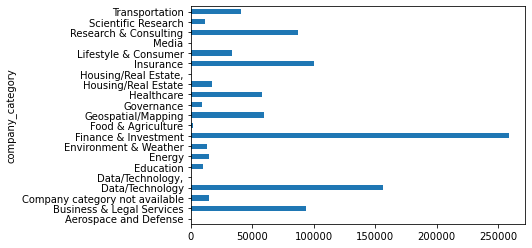

In [ ]:
#Let's see the distribution of number of employees under each type of 'company_category'
cc=DataSet.groupby(['company_category'])['employees'].sum()
print("This is distribution of employees over different company categories: ")
cc.plot(kind='barh')

In [ ]:
print("'Finance & Investment' has the maximum exployment")

'Finance & Investment' has the maximum exployment


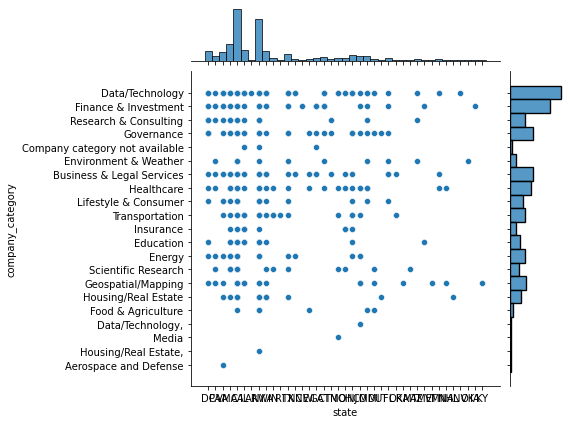

In [ ]:
#joint plot of 'company_category' and 'state'
sns.jointplot(x = 'state',y='company_category',data = DataSet)

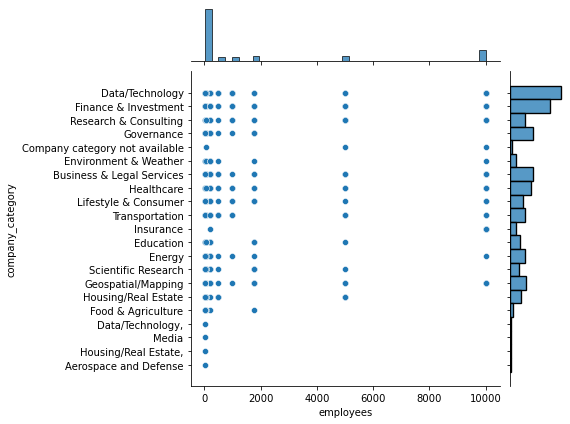

In [ ]:
#joint plot of 'company_category' and 'employees'
sns.jointplot(x = 'employees',y='company_category',data=DataSet)

In [ ]:
print("Which 'Public' company is involved in 'Education' category?")
Df_type = DataSet["company_type"]=="Public"
Df_category = DataSet["company_category"]=="Education"
DataSet[Df_type & Df_category]

Which 'Public' company is involved in 'Education' category?


,company_name,year_founded,city,state,company_type,company_category,revenue_source,business_model,description,description_short,employees
361,Peterson's,1966.0,Paramus,NJ,Public,Education,not reported by company,business to consumer,Peterson's provides an integrated suite of pro...,Peterson's provides an integrated suite of pro...,200.0


In [ ]:
print("How many 'categories' fall under which 'company_type'? Which are they?")
f=DataSet.groupby(["company_type","company_category"])["company_category"].count()
dff=pd.DataFrame(f)
dff.tail(25)

How many 'categories' fall under which 'company_type'? Which are they?


company_category
company_type                   company_category                                
Private                        Scientific Research                           12
                               Transportation                                27
Public                         Business & Legal Services                      8
                               Company category not available                 2
                               Data/Technology                               15
                               Education                                      1
                               Energy                                         1
                               Environment & Weather                          2
                               Finance & Investment                          19
                               Food & Agriculture                             1
                               Geospatial/Mapping                             6
                               Governance                                     3
                               Healthcare                                     6
                               Housing/Real Estate                            6
                               Insurance                                      7
                               Lifestyle & Consumer                           5
                               Research & Consulting                          7
                               Scientific Research                            2
                               Transportation                                 1
Public (Federal-USGS)          Geospatial/Mapping                             1
nonprofit + commercial spinoff Healthcare                                     1
partnership                    Business & Legal Services                      2
                               Data/Technology                                1
                               Finance & Investment                           1
sole proprietorship            Education                                      1

In [ ]:
print("From above we can infer that many 'Public' companies are based on 'Finance & Investment' ")

From above we can infer that many 'Public' companies are based on 'Finance & Investment' 


In [ ]:
#Let's find the most and least popular state for 'Finance & investment' category
category_state=DataSet.groupby(['company_category'])
x=category_state.get_group(('Finance & Investment'))
FnI=list(x['state'])
z=dict(Counter(FnI))
q={value:key for key, value in z.items()}


uuu=q[max(list(q.keys()))]
m=q[min(list(q.keys()))]
print('State which is not popular for "Finance & Investment" category:',m)
print('State which is popular for "Finance & Investment" category:',uuu)
print('--------------------------------------------------------------------------------------------------------------------')

#Let's find the most and least popular state for 'Governance'
GOV=category_state.get_group(('Governance'))
Gov=list(GOV['state'])
yy=Counter(Gov)
gov={value:key for key, value in yy.items()}

CC=gov[max(list(gov.keys()))]
DD=gov[min(list(gov.keys()))]
print('State with unpopular Governance category:',DD)
print('State with popular Governance category:',CC)

State which is not popular for "Finance & Investment" category: IA
State which is popular for "Finance & Investment" category: NY
--------------------------------------------------------------------------------------------------------------------
State with unpopular Governance category: TN
State with popular Governance category: CA


In [ ]:
#Lets find out which year witnessed the growth in 'Data/Technology' based companies
da=category_state.get_group(('Data/Technology'))
year=list(da['year_founded'])
year_count=Counter(year)
print("The year with the most number of 'Data/Technology' based companies was :",max(year_count))
print("The trend towards data analysis started roughly around 2014")

The year with the most number of 'Data/Technology' based companies was : 2014.0
The trend towards data analysis started roughly around 2014


In [ ]:
#Lets find the list of 'Private - Finance & Investment' companies
c=DataSet.groupby(['company_type','company_category'])
s = c.get_group(('Private','Finance & Investment'))

print("Companies with 'company_type-Private' and 'company_category-Finance & Investment' are :")
s.head(5)


Companies with 'company_type-Private' and 'company_category-Finance & Investment' are :


,company_name,year_founded,city,state,company_type,company_category,revenue_source,business_model,description,description_short,employees
1,48 Factoring Inc.,2014.0,Philadelphia,PA,Private,Finance & Investment,financial services,business to business,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,200.0
29,Asset4,2003.0,New York,NY,Private,Finance & Investment,not reported by company,business to business,ASSET4 AG provides investment research informa...,"Asset4 provides objective, comparable and audi...",200.0
35,Avalara,2004.0,Bainbridge Island,WA,Private,Finance & Investment,not reported by company,business to consumer,Avalara has created a web-based platform that ...,Avalara combines technology with available sta...,1000.0
43,Berkery Noyes MandASoft,2009.0,New York,NY,Private,Finance & Investment,not reported by company,"business to business, business to consumer","MandAsoft.com, provided by Berkery Noves, is a...","MandAsoft.com, created by Berkery Noyes, is a ...",10.0
46,BillGuard,2010.0,New York,NY,Private,Finance & Investment,user fees for web or mobile access,business to consumer,BillGuard's mission is to use data to save peo...,BillGuard is a personal finance security compa...,50.0


In [ ]:
#Let's analyze the different primary 'revenue_source'
#Splitting the revenue columns to different columns
list_of_revenue= DataSet['revenue_source'].str.split(',', expand=True)
list_of_revenue
#combining dataset(company_name) and list_of_revenue
rev_model=pd.concat([DataSet["company_name"],list_of_revenue], axis=1)
rev_model
#Count the total number of companies under a particular 'revenue_source'
print("Count the total number of companies who collect revenue from certain sector ")
rev=rev_model.groupby([0])["company_name"].count()
rev

Count the total number of companies who collect revenue from certain sector 


0
advertising                                                 26
brokerage fees                                               1
consulting                                                   7
customers                                                    1
data analysis for clients                                   47
database licensing                                          12
design consulting                                            1
educational assessment                                       1
financial products and services                              1
financial services                                           1
government & defense                                         1
government contract                                          1
growing number of small businesses we are able to serve      1
ict product and services                                     1
ip licensing                                                 1
it and business hardware                             

In [ ]:
print("There are many companies whose 'revenue_source' is not reported/provided")

There are many companies whose 'revenue_source' is not reported/provided


In [ ]:
# Let's analyze how many conpanies deal with 'nonprofit' 'business_model'
print("How many conpanies deal with nonprofit business_model")
my_ids = DataSet['business_model'].values.tolist()
my_ids.count("Nonprofit")
DataSet[DataSet["business_model"] == 'nonprofit']

How many conpanies deal with nonprofit business_model


,company_name,year_founded,city,state,company_type,company_category,revenue_source,business_model,description,description_short,employees
77,Center for Responsive Politics,1983.0,Washington DC,DC,Nonprofit,Research & Consulting,not reported by company,nonprofit,"As a nonpartisan, independent and nonprofit or...",The Center for Responsive Politics is a resear...,50.0
83,Chemical Abstracts Service,1907.0,Columbus,OH,Nonprofit,Scientific Research,not reported by company,nonprofit,CAS originated in 1907 when the American Chemi...,"Chemical Abstracts Service, a division of the ...",5000.0
206,GuideStar,1994.0,Washington,DC,Nonprofit,Governance,"data analysis for clients, database licensing,...",nonprofit,We believe a strong nonprofit information infr...,GuideStar's mission is to revolutionize philan...,200.0
222,ideas42,2008.0,New York,NY,Nonprofit,Research & Consulting,philanthropic grants,nonprofit,ideas42 is a design and research lab that uses...,Ideas42 uses behavioral economics to do social...,50.0


In [ ]:
print("There are only 4 companies whose 'business_model' is 'nonprofit'")

There are only 4 companies whose 'business_model' is 'nonprofit'


In [ ]:
#How many cities have have a primary 'business_model' of 'Business to Business' ?

In [ ]:
DataSet["business_model"]= DataSet["business_model"].str.split(",", n = 1, expand = True)
x=DataSet["business_model"]
dfx=pd.DataFrame(x)
citynew=DataSet["city"]
dfx=dfx.join(citynew)
print(dfx)


              business_model           city
0       business to business     Washington
1       business to business   Philadelphia
2       business to business        Fairfax
3    not reported by company      Cambridge
4       business to consumer      San Ramon
..                       ...            ...
524  not reported by company        Seattle
525  not reported by company       New York
526     business to business         Austin
527     business to business       New York
528  not reported by company     Schaumburg

[529 rows x 2 columns]


In [ ]:
#We grouped along with name of city
p=dfx.groupby(["business_model","city"])["city"].count()
print(p)

business_model           city         
academia                 Corte Madera     1
business to business      Philadelphia    1
                         Addison          1
                         Amherst          1
                         Ann Arbor        2
                                         ..
not reported by company  Waltham          1
                         Washington       3
                         Wayne            1
                         Yonkers          1
                         Yorkville        1
Name: city, Length: 259, dtype: int64


business_model
academia                     1
business to business       305
business to consumer       125
business to government      19
nonprofit                    4
not reported by company     75
Name: city, dtype: int64


<AxesSubplot:ylabel='business_model'>

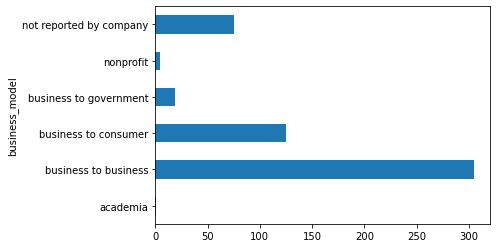

In [ ]:
p=dfx.groupby(["business_model"])["city"].count()
print(p)

p.plot(kind='barh')

In [ ]:
#Let's analyze which 'revenue_source' emerged across the cities around which year?
rev=DataSet.groupby(["revenue_source","city"])["year_founded"].mean()
rev.head(5)

revenue_source  city         
advertising     Baltimore        2007.0
                Columbia         2004.0
                San Francisco    2005.0
                Santa Barbara    2010.0
                Sunnyvale        2012.0
Name: year_founded, dtype: float64

In [ ]:
print("'adverstising' in Baltimore became a source of revenue roughly around the year 2007")

'adverstising' in Baltimore became a source of revenue roughly around the year 2007


In [ ]:
#Let's apply machine learning algorithm to predict 'company_category'
#We use the concept of 'Multinomial Logistic Regression' to predict the different classes under 'company_category'

#'company_category' classification using Random Forest Classifier.
# import necessary libraries

import nltk

#nltk.download('wordnet')
#nltk.download('stopwords')


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text

import re

from sklearn.feature_extraction.text import TfidfVectorizer

from numpy import array
from sklearn.preprocessing import LabelEncoder

In [ ]:
#text processing - which is a crucial step in NLP
#lemmatization and stemming - grouping together different inflected forms of the word so they can be analyzed as a single item

documents = []
#combining both 'description' and 'description_short'
X = DataSet['description'] + DataSet['description_short']  + DataSet['business_model']
# Since the 'revenue_source' has a lot of 'not reported/provided by company' value we have not included in Machine Learning
stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)

In [ ]:
#transforms text to feature vectors that can be used as input to estimators.

tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [ ]:
#here we assign categorical - numeric values to 'company_type', 'state' and 'company_category'
#Label Encoding - refers to converting the labels into a numeric form
#It is an important pre-processing step in supervised learning.

le = LabelEncoder()

c_t = array(DataSet['company_type'])
c_type = le.fit_transform(c_t)
c_type = c_type.tolist()

c_s = array(DataSet['state'])
c_state = le.fit_transform(c_s)
c_state = c_state.tolist()

c_c = array(DataSet['company_category'])
c_cat = le.fit_transform(c_c)
c_cat = c_cat.tolist()

c_ci = array(DataSet['city'])
c_cit = le.fit_transform(c_ci)
c_cit = c_cit.tolist()

In [ ]:
#XX is the feauture dataframe
#independent columns
X = pd.DataFrame(X)

XX = pd.DataFrame([DataSet['year_founded'],DataSet['employees']])
XX = XX.transpose()
XX['state'] = c_state
XX['company_type'] = c_type
#XX['city'] = c_cit

XX = pd.concat([X,XX],axis=1)
XX.shape

(529, 1031)

In [ ]:
#y is for the prediction - 'company_category'
#dependent column
y = pd.DataFrame(c_cat)
y.columns = ['category']
# to convert into proper dimensions.
y = np.ravel(y)
y.shape

(529,)

In [ ]:
#splitting of data into train and test indices.
#train - dataset is 75%
#test - dataset is 25%
#random_state is a seed value. used for initializing the internal random number generator which will decide the
X_tr, X_te, y_tr, y_te = sklearn.model_selection.train_test_split(XX, y, train_size = 0.75, random_state=55)

#machine learning model - multivariate logistic regression - Random Forest Classifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_tr, y_tr)
y_pred = classifier.predict(X_te)
print("The accuracy is : ",accuracy_score(y_te, y_pred))

The accuracy is :  0.6090225563909775
